In [2]:
import tensorflow as tf
tf.__version__ 

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

'2.12.0'

In [3]:
# Import The Libraries 
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential

import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [4]:
# Paths
train_Path = '/kaggle/input/train/train/train'
test_Path = '/kaggle/input/train/test/test'
val_set = '/kaggle/input/train/val/val'

In [5]:
# Set Resize variable
IMAGE_SIZE = [224, 224] 
# This is my desired image size... 
#and also ResNet50 accepts image of 224*224.

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [7]:
model = Sequential()

In [8]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.3, input_shape=(224,224,64)))
model.add(Conv2D(64, (3,3), 1, activation='relu'))
model.add(Conv2D(64, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2, input_shape=(224,224,128)))
model.add(Conv2D(128, (3,3), 1, activation='relu'))
model.add(Conv2D(128, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(224, activation='relu'))
model.add(Dense(10, activation='sigmoid'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 conv2d_2 (Conv2D)           (None, 107, 107, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 53, 53, 32)        0

In [10]:
logdir='logs'

In [11]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [12]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
training_set = train_datagen.flow_from_directory(train_Path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 8713 images belonging to 10 classes.


In [14]:
test_set = test_datagen.flow_from_directory(val_set,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 2905 images belonging to 10 classes.


In [31]:
test_data_generator = ImageDataGenerator(preprocessing_function=lambda x: (x.astype(np.float32) / 255.0))
test_generator = test_data_generator.flow_from_directory(
    test_Path,
    target_size=(224, 224),
    batch_size=1,
    class_mode='categorical',
    shuffle=False
)

Found 2911 images belonging to 10 classes.


In [15]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [16]:
hist = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=40,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/tmp/ipykernel_28/313080110.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(


Epoch 1/40


2023-05-30 04:14:19.618272: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


273/273 [==============================] - 193s 666ms/step - loss: 1.6243 - accuracy: 0.4393 - val_loss: 1.4993 - val_accuracy: 0.4795
Epoch 2/40
273/273 [==============================] - 108s 395ms/step - loss: 1.1522 - accuracy: 0.6053 - val_loss: 1.2560 - val_accuracy: 0.5862
Epoch 3/40
273/273 [==============================] - 111s 405ms/step - loss: 0.8516 - accuracy: 0.7081 - val_loss: 0.8224 - val_accuracy: 0.7177
Epoch 4/40
273/273 [==============================] - 109s 397ms/step - loss: 0.6900 - accuracy: 0.7620 - val_loss: 0.9865 - val_accuracy: 0.6881
Epoch 5/40
273/273 [==============================] - 109s 398ms/step - loss: 0.5269 - accuracy: 0.8127 - val_loss: 0.6176 - val_accuracy: 0.7928
Epoch 6/40
273/273 [==============================] - 109s 400ms/step - loss: 0.4703 - accuracy: 0.8328 - val_loss: 0.7826 - val_accuracy: 0.7367
Epoch 7/40
273/273 [==============================] - 111s 406ms/step - loss: 0.3994 - accuracy: 0.8544 - val_loss: 0.5967 - val_accura

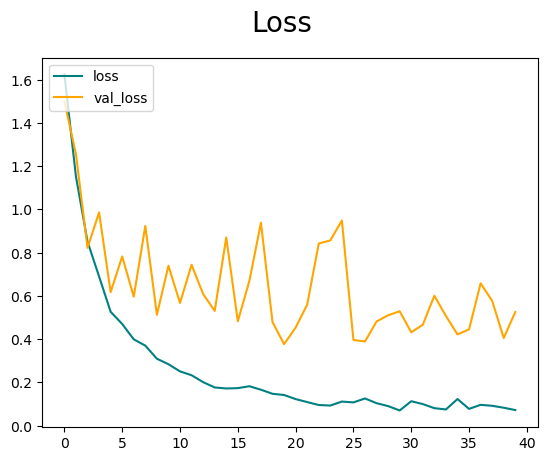

In [17]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

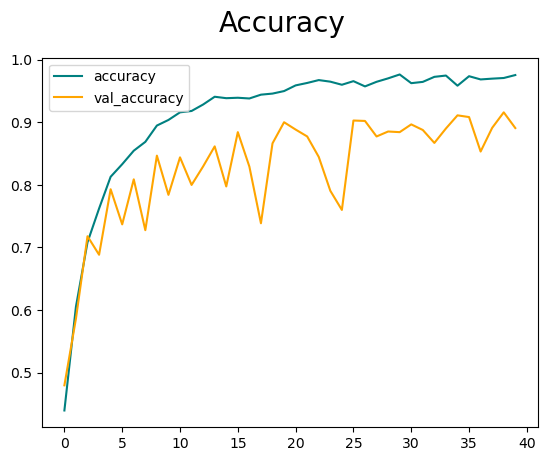

In [18]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [19]:
tf.keras.models.save_model(model, "model.h5")

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

2911/2911 [==============================] - 11s 4ms/step


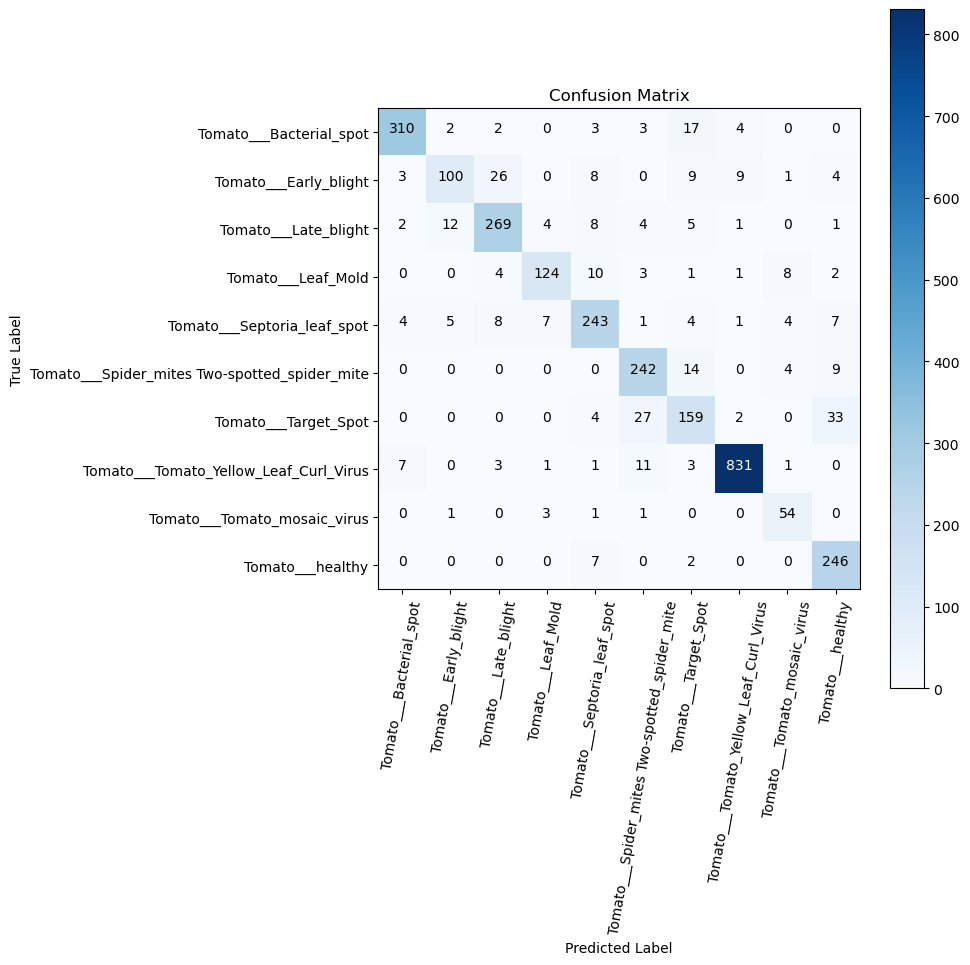

In [43]:
# Get the true labels for the test set
true_labels = test_generator.classes

# Generate predictions for the test set
predictions = model.predict(test_generator)
predicted_labels = np.argmax(predictions, axis=1)

# Create confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Define class labels
class_labels = list(test_generator.class_indices.keys())

# Plot confusion matrix
plt.figure(figsize=(10, 10))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=80)
plt.yticks(tick_marks, class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add values to the confusion matrix plot
thresh = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

2911/2911 [==============================] - 11s 4ms/step


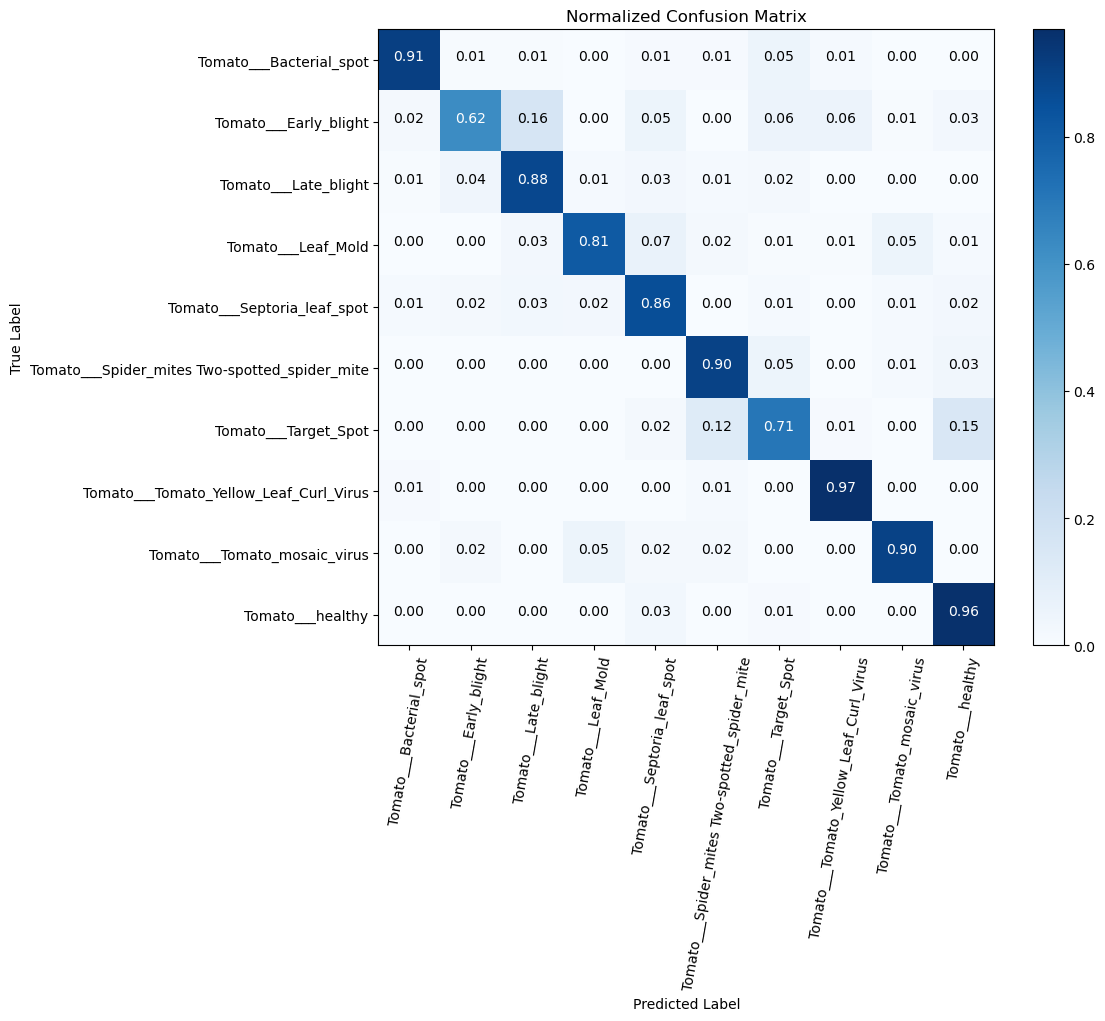

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Get the true labels for the test set
true_labels = test_generator.classes

# Generate predictions for the test set
predictions = model.predict(test_generator)
predicted_labels = np.argmax(predictions, axis=1)

# Create confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Compute normalized confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Define class labels
class_labels = list(test_set.class_indices.keys())

# Plot normalized confusion matrix
plt.figure(figsize=(10, 8))
plt.imshow(cm_normalized, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Normalized Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=80)
plt.yticks(tick_marks, class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add values to the normalized confusion matrix plot
thresh = cm_normalized.max() / 2.0
for i in range(cm_normalized.shape[0]):
    for j in range(cm_normalized.shape[1]):
        plt.text(j, i, format(cm_normalized[i, j], '.2f'),
                 horizontalalignment="center",
                 color="white" if cm_normalized[i, j] > thresh else "black")


plt.show()


In [34]:
from sklearn.metrics import classification_report

# Generate predictions for the test set
y_true = test_generator.classes
y_pred_prob = model.predict(test_generator, verbose=1)
y_pred = np.argmax(y_pred_prob, axis=1)

# Print classification report
print(classification_report(y_true, y_pred, target_names=test_set.class_indices.keys()))


2911/2911 [==============================] - 11s 4ms/step
                                               precision    recall  f1-score   support

                      Tomato___Bacterial_spot       0.95      0.91      0.93       341
                        Tomato___Early_blight       0.83      0.62      0.71       160
                         Tomato___Late_blight       0.86      0.88      0.87       306
                           Tomato___Leaf_Mold       0.89      0.81      0.85       153
                  Tomato___Septoria_leaf_spot       0.85      0.86      0.85       284
Tomato___Spider_mites Two-spotted_spider_mite       0.83      0.90      0.86       269
                         Tomato___Target_Spot       0.74      0.71      0.72       225
       Tomato___Tomato_Yellow_Leaf_Curl_Virus       0.98      0.97      0.97       858
                 Tomato___Tomato_mosaic_virus       0.75      0.90      0.82        60
                             Tomato___healthy       0.81      0.96     

In [35]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get the positive class probability predictions
y_pred_prob = model.predict(test_generator, verbose=1)[:, 1]

# Get the true positive rate and false positive rate
fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)

# Calculate the area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

2911/2911 [==============================] - 11s 4ms/step


ValueError: multiclass format is not supported